In [30]:
#Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import os
import scipy.stats as sts
import scipy.stats as stats

In [2]:
#Read dataset
property_data = os.path.join('Resources', 'property_sales.csv')
property_df = pd.read_csv(property_data)
property_df.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,SuffixDire,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,N,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,N,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,S,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001


In [65]:
current_df = pd.DataFrame(property_df)
current2_df = pd.DataFrame()

In [7]:
current_df.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,SuffixDire,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,N,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,N,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,S,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001


In [26]:
current_df = property_df.loc[property_df["Gross_Sale"]<1000000, :]

In [25]:
current_df.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT,Sale
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128,159900.0
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138,169500.0
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138,169500.0
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140,162500.0
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001,284900.0


In [20]:
current_df ['Sale'] = property_df['Gross_Sale']

<ipython-input-20-c15880a95f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df ['Sale'] = property_df['Gross_Sale']


In [21]:
current2_df['Sale'] = current_df['Sale'].iloc[30:50]

In [12]:
current2_df.head()

,Sale
30,365000.0
31,267450.0
32,295000.0
33,295000.0
34,360000.0


In [23]:
current_df.dropna()
current2_df.dropna()
current_df.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT,Sale
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128,159900.0
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138,169500.0
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138,169500.0
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140,162500.0
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001,284900.0


In [28]:
ps = current_df['Gross_Sale'].dropna()

Q1 = ps.quantile(0.25)
Q3 = ps.quantile(0.75)
IQR = Q3 - Q1
ps_normalized = current_df[(current_df['Gross_Sale'] < Q3) & (current_df['Gross_Sale'] > Q1)]
current_df = ps_normalized['Gross_Sale']

In [31]:
print(sts.normaltest(current_df.dropna()))

NormaltestResult(statistic=1164.599001019881, pvalue=1.2898526893532034e-253)


In [14]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10143 entries, 0 to 10142
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       10143 non-null  int64  
 1   CRV            9740 non-null   float64
 2   Sale_Date      10143 non-null  object 
 3   InRTOStudy     10143 non-null  object 
 4   Neighborhoood  10143 non-null  object 
 5   Ward           10143 non-null  int64  
 6   PropType       10143 non-null  object 
 7   Address        10143 non-null  object 
 8   HouseNumber    10143 non-null  int64  
 9   HouseNum       7 non-null      object 
 10  PrefixDire     0 non-null      float64
 11  StreetName     10143 non-null  object 
 12  StreetType     10107 non-null  object 
 13  SuffixDire     7375 non-null   object 
 14  Grantee        10143 non-null  object 
 15  Grantor        10143 non-null  object 
 16  Adjusted_S     10143 non-null  int64  
 17  Gross_Sale     10006 non-null  float64
 18  SaleDa

In [15]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9761 entries, 0 to 10142
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       9761 non-null   int64  
 1   CRV            9493 non-null   float64
 2   Sale_Date      9761 non-null   object 
 3   InRTOStudy     9761 non-null   object 
 4   Neighborhoood  9761 non-null   object 
 5   Ward           9761 non-null   int64  
 6   PropType       9761 non-null   object 
 7   Address        9761 non-null   object 
 8   HouseNumber    9761 non-null   int64  
 9   HouseNum       7 non-null      object 
 10  PrefixDire     0 non-null      float64
 11  StreetName     9761 non-null   object 
 12  StreetType     9729 non-null   object 
 13  SuffixDire     7108 non-null   object 
 14  Grantee        9761 non-null   object 
 15  Grantor        9761 non-null   object 
 16  Adjusted_S     9761 non-null   int64  
 17  Gross_Sale     9761 non-null   float64
 18  SaleDat

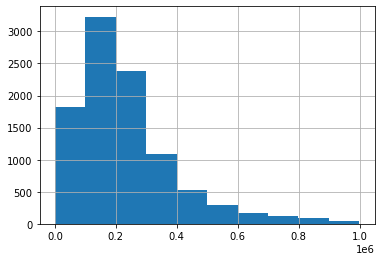

In [55]:
# Histogram Plot of Data
current_df["Gross_Sale"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8419ca3760>]],
      dtype=object)

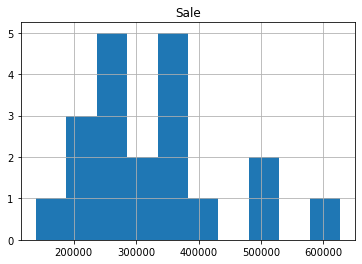

In [56]:
current2_df.hist()

In [67]:
ps = current_df['Gross_Sale'].dropna()
Q1 = ps.quantile(0.25)
Q3 = ps.quantile(0.75)
IQR = Q3 - Q1
ps_normalized = current_df[(current_df['Gross_Sale'] < Q3) & (current_df['Gross_Sale'] > Q1)]
current_df = ps_normalized['Gross_Sale']

In [68]:
#Sample 1 normality test
sample = current_df.sample(frac = 0.5)
population = current_df
sts.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.16933986500917936, pvalue=0.8655430267465841)

In [69]:
#Sample 2 normality test
sample = current_df.sample(frac = 0.1)
population = current_df
sts.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=0.6744866104592773, pvalue=0.5003143498470213)

In [64]:
#Analysis

#The pvalues I got after doing the normality tests from two different samples is 
#greater than the significant level(0.05). 
#The null hypothesis cannot be rejected becuase there is no enough evidence to 
#conclude that the data does not follow a normal distribution. 
#Also,we cannot conclude that the data follows a normal distribution either.